In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dateset and print the first 5 rows
df = pd.read_csv("owid-co2-data.csv")
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,50191.0,1.919883e+03,6.562730e+01,1.750000e+03,1.875000e+03,1.924000e+03,1.974000e+03,2.023000e+03
population,41019.0,5.686141e+07,3.199905e+08,2.150000e+02,3.273130e+05,2.289522e+06,9.862459e+06,8.091735e+09
gdp,15251.0,3.300495e+11,3.086383e+12,4.998000e+07,7.874038e+09,2.743861e+10,1.212627e+11,1.301126e+14
cement_co2,28863.0,7.767746e+00,6.259529e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.860000e-01,1.696308e+03
cement_co2_per_capita,25358.0,5.903585e-02,1.203281e-01,0.000000e+00,0.000000e+00,1.000000e-03,7.575000e-02,2.484000e+00
...,...,...,...,...,...,...,...,...
temperature_change_from_n2o,38060.0,5.089070e-04,3.042583e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.500000e-02
total_ghg,37410.0,4.885422e+02,2.392580e+03,-1.496100e+01,1.835000e+00,1.500750e+01,7.824275e+01,5.381685e+04
total_ghg_excluding_lucf,37236.0,3.161335e+02,1.839602e+03,0.000000e+00,2.350000e-01,2.371000e+00,2.933750e+01,4.411479e+04
trade_co2,4535.0,-7.232399e+00,2.506400e+02,-2.195952e+03,-3.179500e+00,1.518000e+00,9.153500e+00,1.798999e+03


In [35]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [36]:
#Check Null value
df.isnull().sum()

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64

In [37]:
df.shape

(50191, 79)

In [38]:
data = df.copy()

In [39]:
# Filter out aggregate rows
aggregates = ['World', 'Asia', 'Europe', 'Africa', 'Asia (excl. China and India)','European Union (27)', 'European Union', 
              'High-income countries', 'Low-income countries', 
              'Upper-middle-income countries', 'Lower-middle-income countries', 
              'North America', 'South America', 'Oceania']

data = data[~data['country'].isin(aggregates)]

In [40]:
# Select key columns
data = data[['country', 'year', 'co2', 'co2_per_capita', 'population']]

In [41]:
#dropping Null value
data = data.dropna(subset=['co2','population'])

In [42]:
# Checking Null value after dropping Null value
data.isnull().sum()

country           0
year              0
co2               0
co2_per_capita    0
population        0
dtype: int64

In [43]:
data.shape

(22801, 5)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22801 entries, 199 to 50190
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         22801 non-null  object 
 1   year            22801 non-null  int64  
 2   co2             22801 non-null  float64
 3   co2_per_capita  22801 non-null  float64
 4   population      22801 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.0+ MB


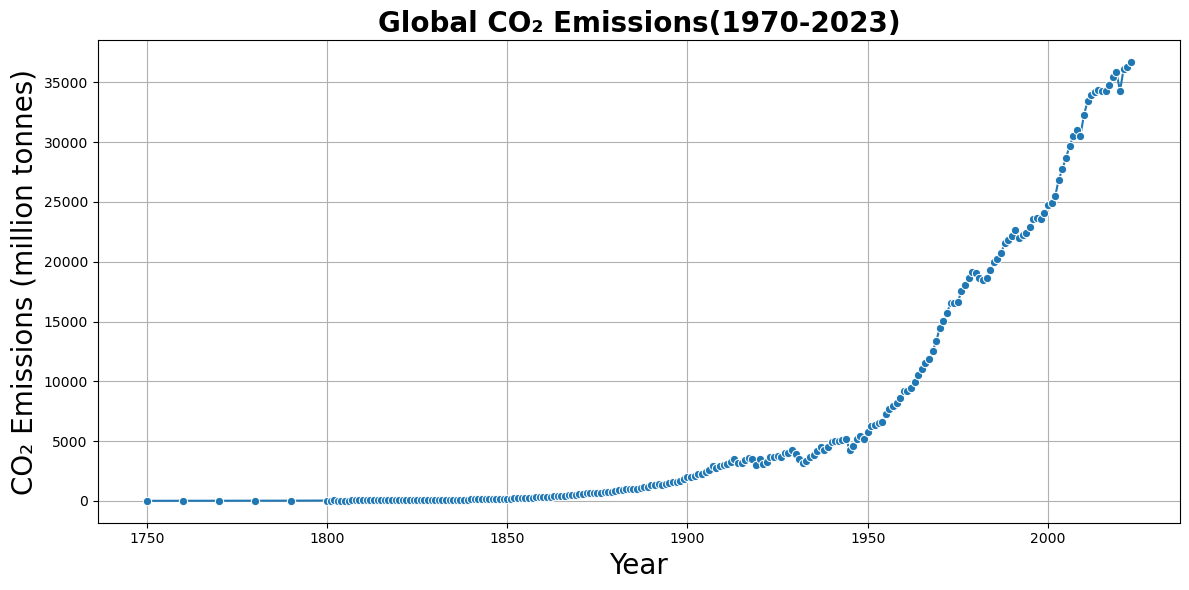

In [45]:
global_trend = data.groupby('year')['co2'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=global_trend, x='year', y='co2', marker='o')
plt.title('Global CO₂ Emissions(1970-2023)',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontsize=20,)
plt.ylabel('CO₂ Emissions (million tonnes)',fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
baseline_year = 1990  #defining a starting year to check for 
latest_year = data['year'].max() #check for the latest year in the dataset

#To find the emission growth and decline among the dataset and grouping them together
emissions_baseline = data[data['year'] == baseline_year].groupby('country')['co2'].sum() 
emissions_latest = data[data['year'] == latest_year].groupby('country')['co2'].sum()

emissions_change = (emissions_latest - emissions_baseline).dropna().sort_values(ascending=True)

# Top 10 growth and decline
top_growth = emissions_change.head(10)
top_decline = emissions_change.tail(10)

print("Top 10 CO₂ Growth Countries (1990 to", latest_year,"):")
print(top_growth)

print("Top 10 CO₂ Decline Countries (1990 to", latest_year,"):")
print(top_decline)

Top 10 CO₂ Growth Countries (1990 to 2023 ):
country
Russia           -720.323
Ukraine          -569.766
Germany          -458.645
United Kingdom   -296.799
United States    -209.566
Japan            -168.608
Italy            -124.746
France           -121.241
Romania          -108.306
Poland            -87.359
Name: co2, dtype: float64
Top 10 CO₂ Decline Countries (1990 to 2023 ):
country
Malaysia         234.555
Brazil           267.812
Turkey           280.462
Vietnam          313.427
South Korea      326.906
Saudi Arabia     554.180
Indonesia        578.143
Iran             606.805
India           2484.328
China           9417.648
Name: co2, dtype: float64


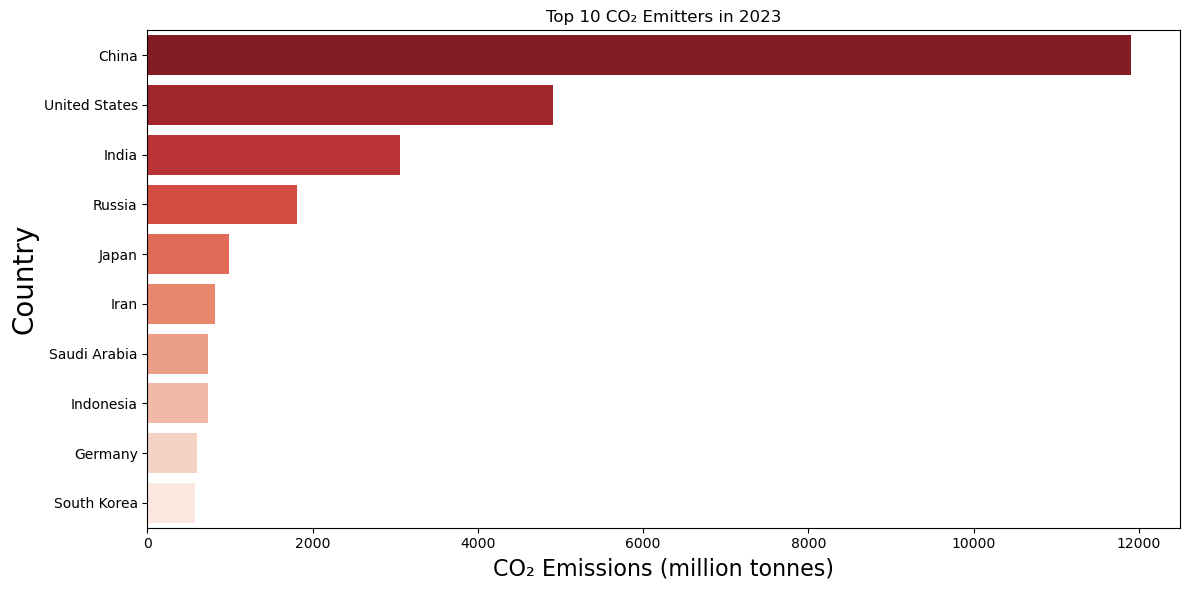

In [47]:
#Bar Chart for Top 10
latest_data = data[data['year'] == latest_year]
top_emitters = latest_data.sort_values('co2', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x='co2', y='country',hue='country', palette='Reds_r')
plt.title(f'Top 10 CO₂ Emitters in {latest_year}',fontsize=20,fontweight='bold')
plt.xlabel('CO₂ Emissions (million tonnes)',fontsize=16)
plt.ylabel('Country',fontsize=20)
plt.title(f'Top 10 CO₂ Emitters in {latest_year}')
plt.tight_layout()
plt.show()

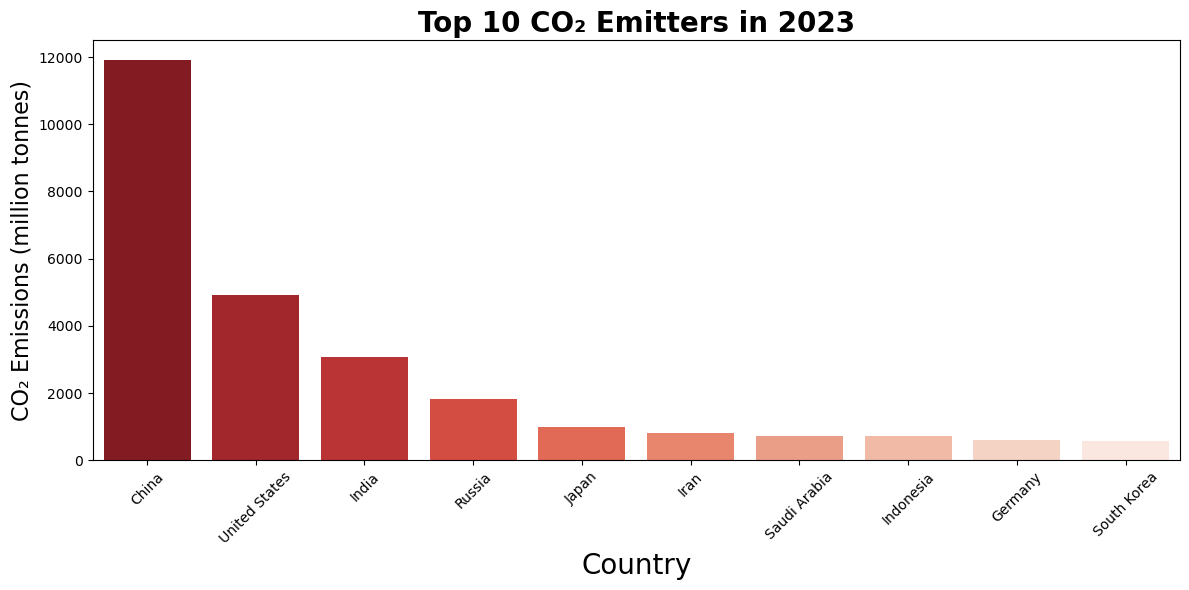

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x='country', y='co2',hue='country', palette='Reds_r')
plt.title(f'Top 10 CO₂ Emitters in {latest_year}',fontsize=20,fontweight='bold')
plt.xlabel('Country',fontsize=20)
plt.ylabel('CO₂ Emissions (million tonnes)',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


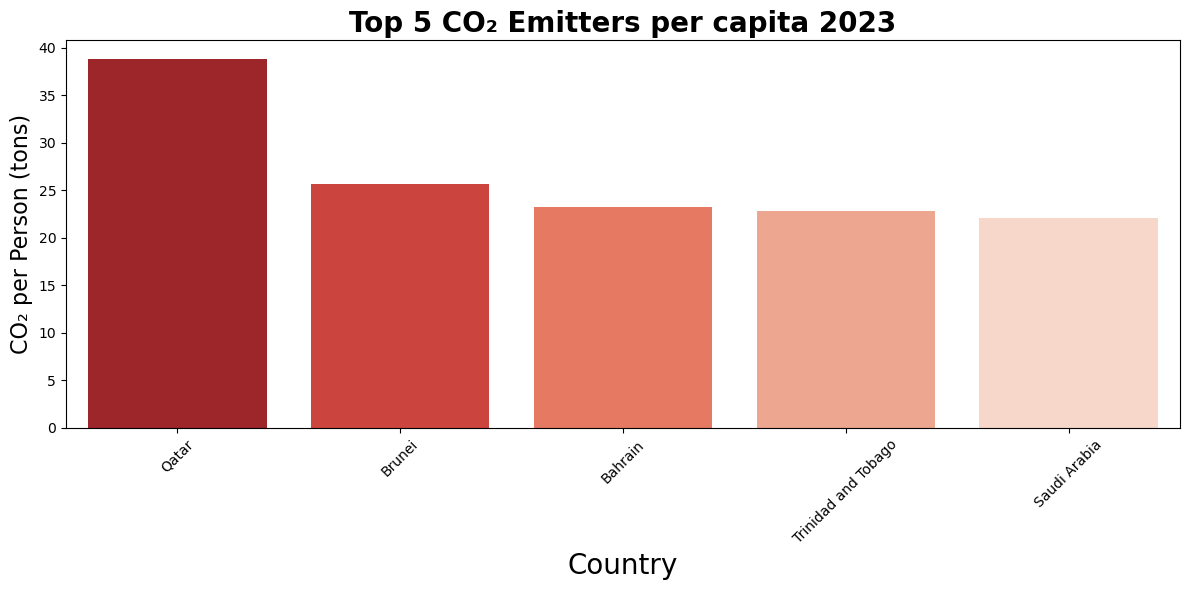

In [58]:
latest_data = data[data['year'] == latest_year]
top_emitters = latest_data.sort_values('co2_per_capita', ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x='country', y='co2_per_capita',hue='country', palette='Reds_r')
plt.title(f'Top 5 CO₂ Emitters per capita {latest_year}',fontsize=20,fontweight='bold')
plt.xlabel('Country',fontsize=20)
plt.ylabel('CO₂ per Person (tons)',fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

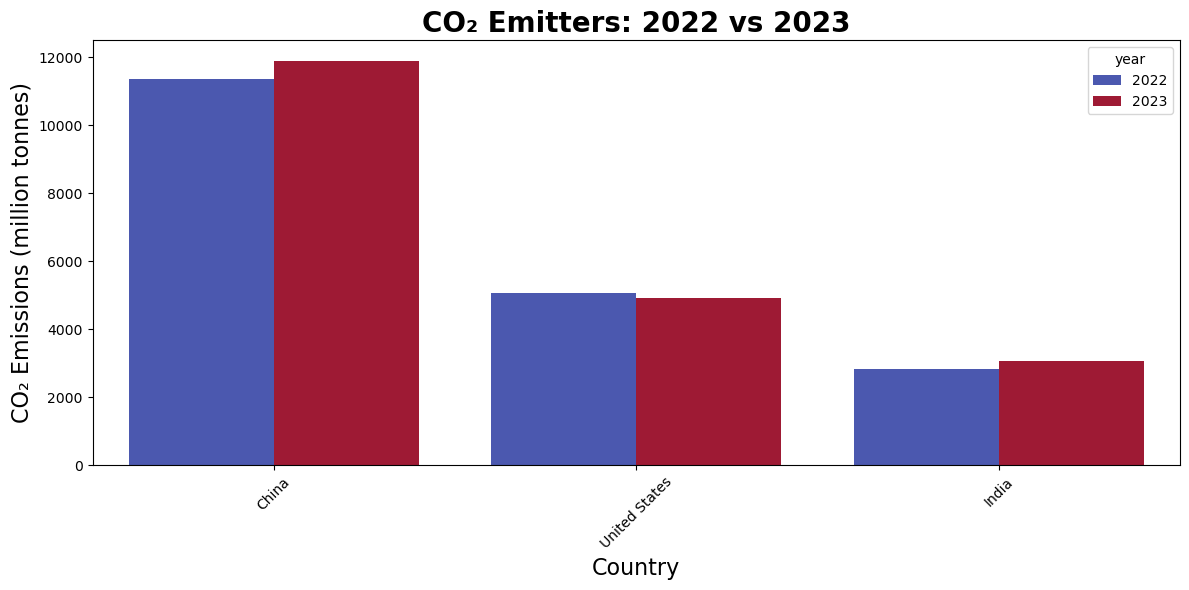

In [30]:

top_countries_2023 = (
    data[(data['year'] == 2023) & (data['co2'] > 0)]
    .sort_values('co2', ascending=False)
    .head(3)['country']
)

# countries in both 2022 and 2023
years_to_compare = [2022, 2023]
data_compare = data[data['year'].isin(years_to_compare)]
data_compare = data_compare[data_compare['country'].isin(top_countries_2023)]

# Set category order to control bar order
data_compare['country'] = pd.Categorical(
    data_compare['country'],
    categories=top_countries_2023.tolist(),
    ordered=True
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data_compare, x='country', y='co2', hue='year', palette='coolwarm')
plt.title('CO₂ Emitters: 2022 vs 2023', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16)
plt.ylabel('CO₂ Emissions (million tonnes)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



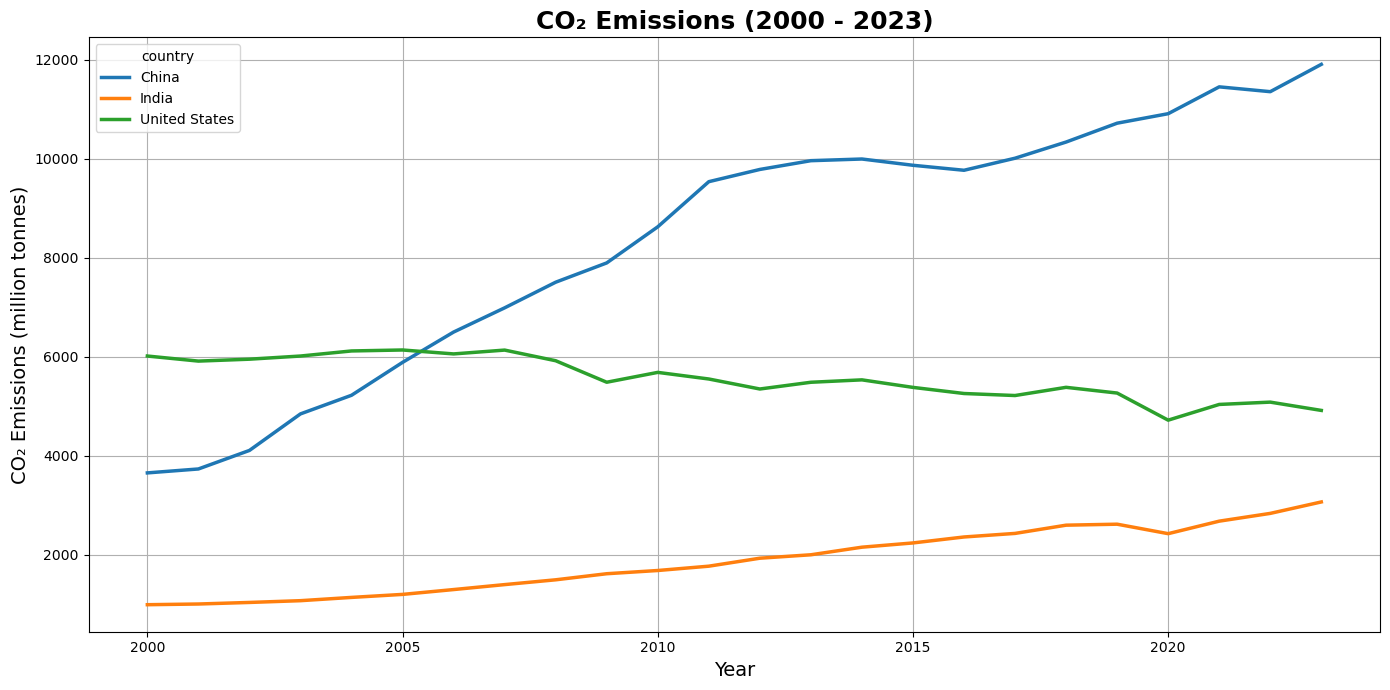

In [24]:
# Filter data from 2000 to 2023
data_recent = data[(data['year'] >= 2000) & (data['year'] <= 2023)]

# Get top 5 countries by total CO₂ emissions
top_emitters = (
    data_recent.groupby('country')['co2']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# Filter dataset for top 5 countries
top_emitters_data = data_recent[data_recent['country'].isin(top_emitters)]

# Plot year-by-year emissions
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=top_emitters_data,
    x='year',
    y='co2',
    hue='country',
    palette='tab10',
    linewidth=2.5
)
plt.title('CO₂ Emissions (2000 - 2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Emissions (million tonnes)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()



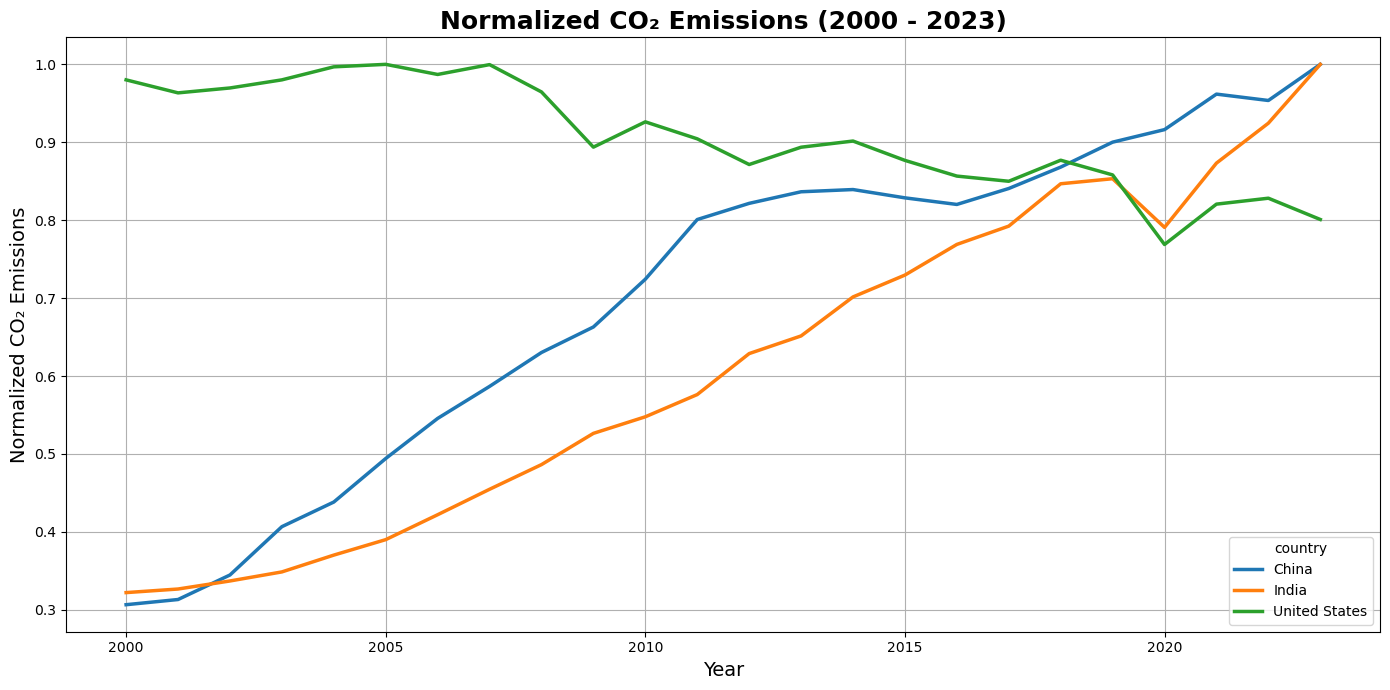

In [25]:
# Filter data from 2000 to 2023
data_recent = data[(data['year'] >= 2000) & (data['year'] <= 2023)]

# Get top 3 countries by total CO₂ emissions
top_emitters = (
    data_recent.groupby('country')['co2']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# Filter data 
top_emitters_data = data_recent[data_recent['country'].isin(top_emitters)].copy()

# Normalize CO₂ emissions per country
top_emitters_data['co2_norm'] = top_emitters_data.groupby('country')['co2'].transform(lambda x: x / x.max())

# Plotting normalized emissions
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=top_emitters_data,
    x='year',
    y='co2_norm',
    hue='country',
    palette='tab10',
    linewidth=2.5
)
plt.title('Normalized CO₂ Emissions (2000 - 2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized CO₂ Emissions', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


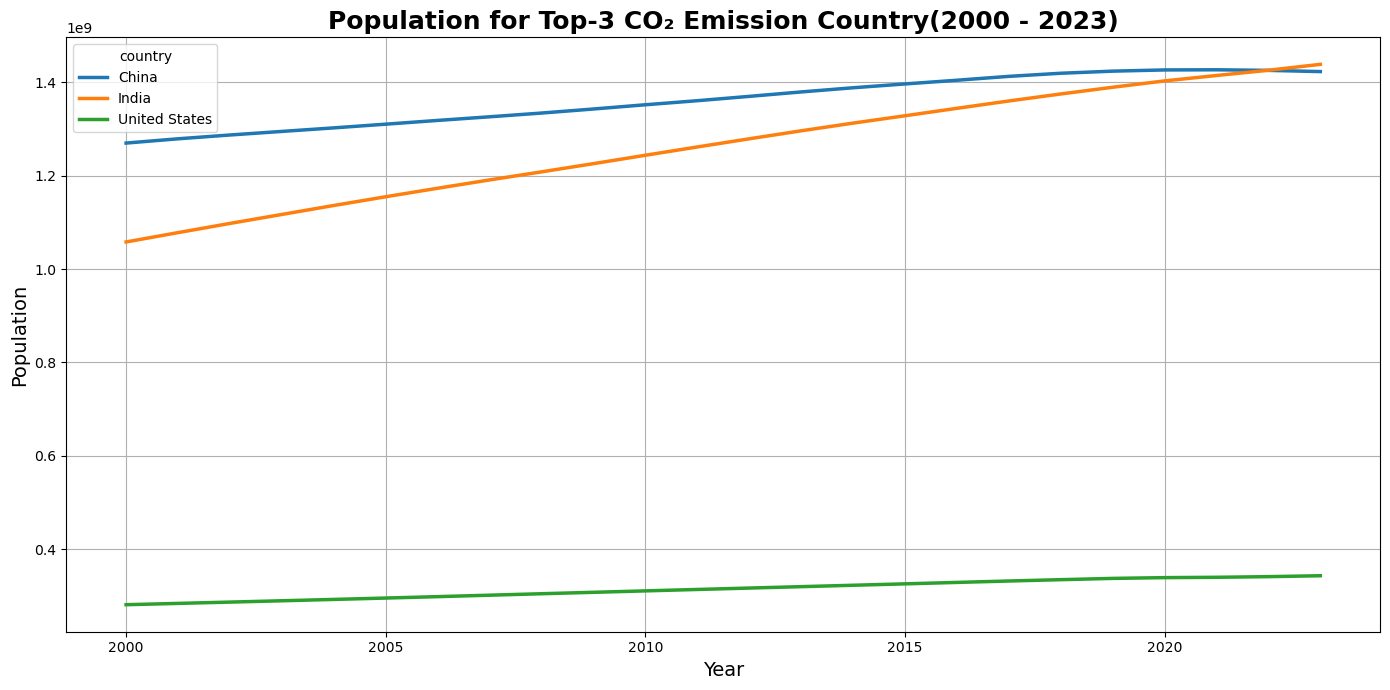

In [26]:
# Filter the data for countries and years
population_data = data_recent[data_recent['country'].isin(top_emitters)]

# Plot year-by-year population
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=population_data,x='year',
    y='population',
    hue='country',
    palette='tab10',
    linewidth=2.5
)
plt.title('Population for Top-3 CO₂ Emission Country(2000 - 2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


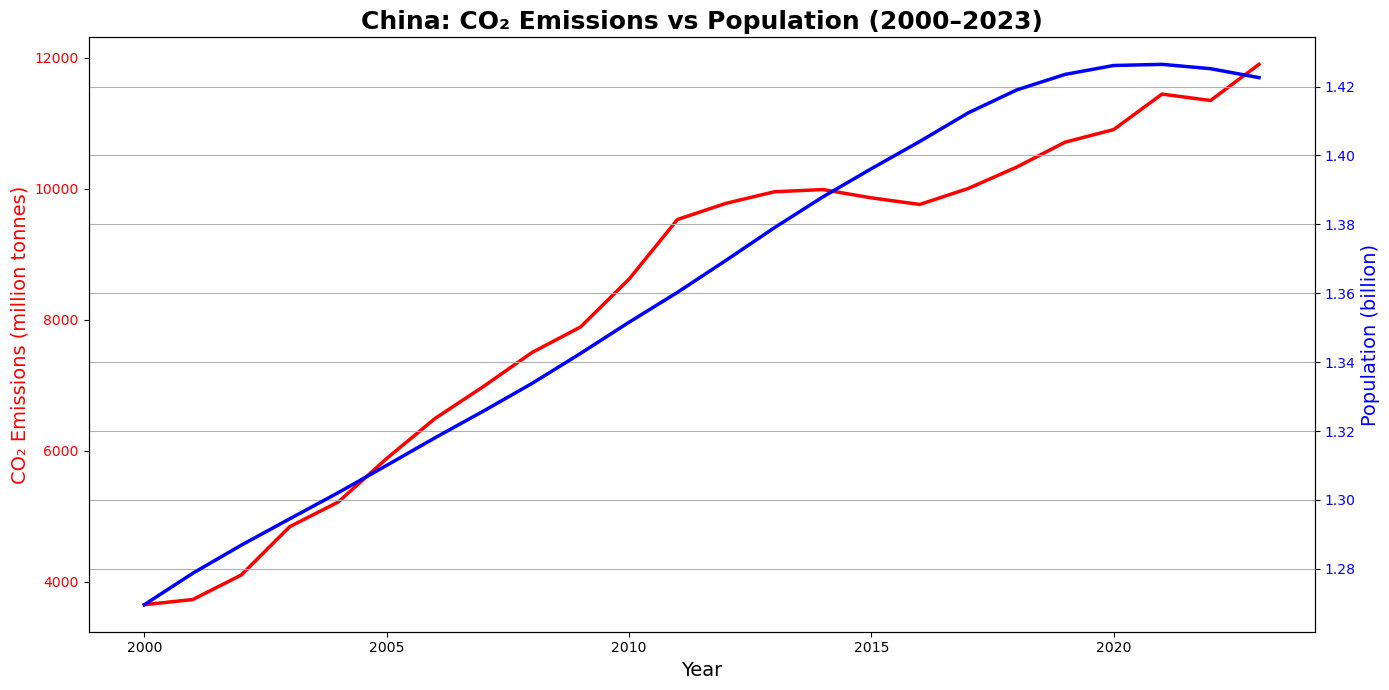

In [59]:
# Filter data for China between 2000 and 2023
china_data = data[(data['country'] == 'China') & (data['year'] >= 2000) & (data['year'] <= 2023)]

# plot Two Y-Axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot CO₂ emissions on primary Y-axis
ax1.plot(china_data['year'], china_data['co2'], color='red', linewidth=2.5, label='CO₂ Emissions (Mt)')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CO₂ Emissions (million tonnes)', color='red', fontsize=14)
ax1.tick_params(axis='y', labelcolor='red')

# Create secondary Y-axis for population
ax2 = ax1.twinx()
ax2.plot(china_data['year'], china_data['population'] / 1e9, color='blue', linewidth=2.5, label='Population (B)')
ax2.set_ylabel('Population (billion)', color='blue', fontsize=14)
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title("China: CO₂ Emissions vs Population (2000–2023)", fontsize=18, fontweight='bold')
fig.tight_layout()
plt.grid(True)
plt.show()
